In [1]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy

# importing algorithms
# from BFGS_multistart import*
# from Stochastic_local_search import*
# from Cuadratic_opt_v2 import *
# from Scipy_opt_algs import*
# from BO_NpScpy import*
# importing test functions
from test_function import *
from utils import *
from COBYQA import *
from opt_GPyOpt import *

# from ScikitQuant_opt_algs import *
# from pySOT_opt_algs import *
# from CUATRO import *
# from ENTMOOT import *
from TuRBO import *
from CSTR_PID import *
from BFGS_multistart import*
from Stochastic_local_search import*
from Cuadratic_opt_v2 import *
from Scipy_opt_algs import*
from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
from ScikitQuant_opt_algs import *
from pySOT_opt_algs import *
from CUATRO import *
from ENTMOOT import *

##########################
# Algorithms & Functions #
##########################

home_dir = "images/trajectory_plots_1D_&_tables"

algorithms_test = [
    opt_SnobFit,
    opt_SRBF,
    opt_DYCORS,
    opt_SOP,
    opt_COBYLA,
    TuRBO_Optimizer,
    COBYQA,
    opt_CUATRO,
    opt_CUATRO_pls,
    GPyOpt_BO
    # took ENTMOOT and our implementation of BO (BO_np_scipy) and LS_QM_V2 out
]

functions_test = ["cstr_pid_f"]


###########################
# Optimization parameters #
###########################

N_x_l = [32]  # Number of input dimensions

start_ = [
    # 5,
    # 10,
    15,
]  # starting points on the trajectory of the algorithm on the test function

reps = 10

f_eval_l = [
    # 20,
    # 50,
    40,
]  # These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l

home_dir  = 'images/CSTR_PID/trajectory_plots_1D_&_tables'
SafeData = True

In [2]:
info, trajectories, timestamp = ML4CE_uncon_eval(
    N_x_l, f_eval_l, functions_test, algorithms_test, reps, home_dir, SafeData=SafeData
)

=====================  cstr_pid_f D32
==  opt_SnobFit


100%|██████████| 2/2 [00:07<00:00,  3.64s/it]


==  opt_SRBF


100%|██████████| 2/2 [00:04<00:00,  2.12s/it]


==  opt_DYCORS


100%|██████████| 2/2 [00:04<00:00,  2.13s/it]


==  opt_SOP


100%|██████████| 2/2 [00:04<00:00,  2.44s/it]


==  opt_COBYLA


100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


==  TuRBO_Optimizer


100%|██████████| 2/2 [00:11<00:00,  5.73s/it]


==  COBYQA


100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


==  opt_CUATRO


100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


==  opt_CUATRO_pls


 50%|█████     | 1/2 [00:01<00:01,  1.23s/it]

[12.763025426584406, -2.8630747467646986, 3.463156647557651, -0.6724766048731332, 1.6228557479442511]


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


[11.751593930668626, -5.7360339816768855, 0.3970369931765352, -0.06018484808215345, 0.2931333488939024]
==  GPyOpt_BO


100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


### Benchmark

### Load trajectories

In [3]:
# import pickle

# # Open the file in binary mode for reading
# with open(r'C:\Users\mathi\OneDrive\01_Studium\PhD\Projects\01_Book_Chapter\DDO-4-ChemEng\Benchmarking\01_unconstrained\images\CSTR_PID\trajectory_plots_1D_&_tables\2024-07-11_10-39-45\trajectories.pkl', 'rb') as file:
#     # Load the object from the file
#     trajectories = pickle.load(file)

# # when loading data make sure to copy the folder name to get the timestamp
# timestamp = '2024-07-11_10-39-45'

### Plot performance tables 

In [4]:
array = ML4CE_uncon_table(
    trajectories, algorithms_test, functions_test, "cstr_pid_f", N_x_l, start_
)

==   opt_SnobFit  ==
==   opt_SRBF  ==
==   opt_DYCORS  ==
==   opt_SOP  ==
==   opt_COBYLA  ==
==   TuRBO_Optimizer  ==
==   COBYQA  ==
==   opt_CUATRO  ==
==   opt_CUATRO_pls  ==
==   GPyOpt_BO  ==


In [5]:
ML4CE_uncon_table_plot(
    array, functions_test, algorithms_test, N_x_l, home_dir, timestamp, SafeFig=SafeData
)

The directory 'images/CSTR_PID/trajectory_plots_1D_&_tables\2024-07-11_16-03-50\tables' does not exist in the root directory. Creating directory.


### Plot graphs

The directory 'images/CSTR_PID/trajectory_plots_1D_&_tables\2024-07-11_16-03-50\trajectory_plots_1D' does not exist in the root directory.


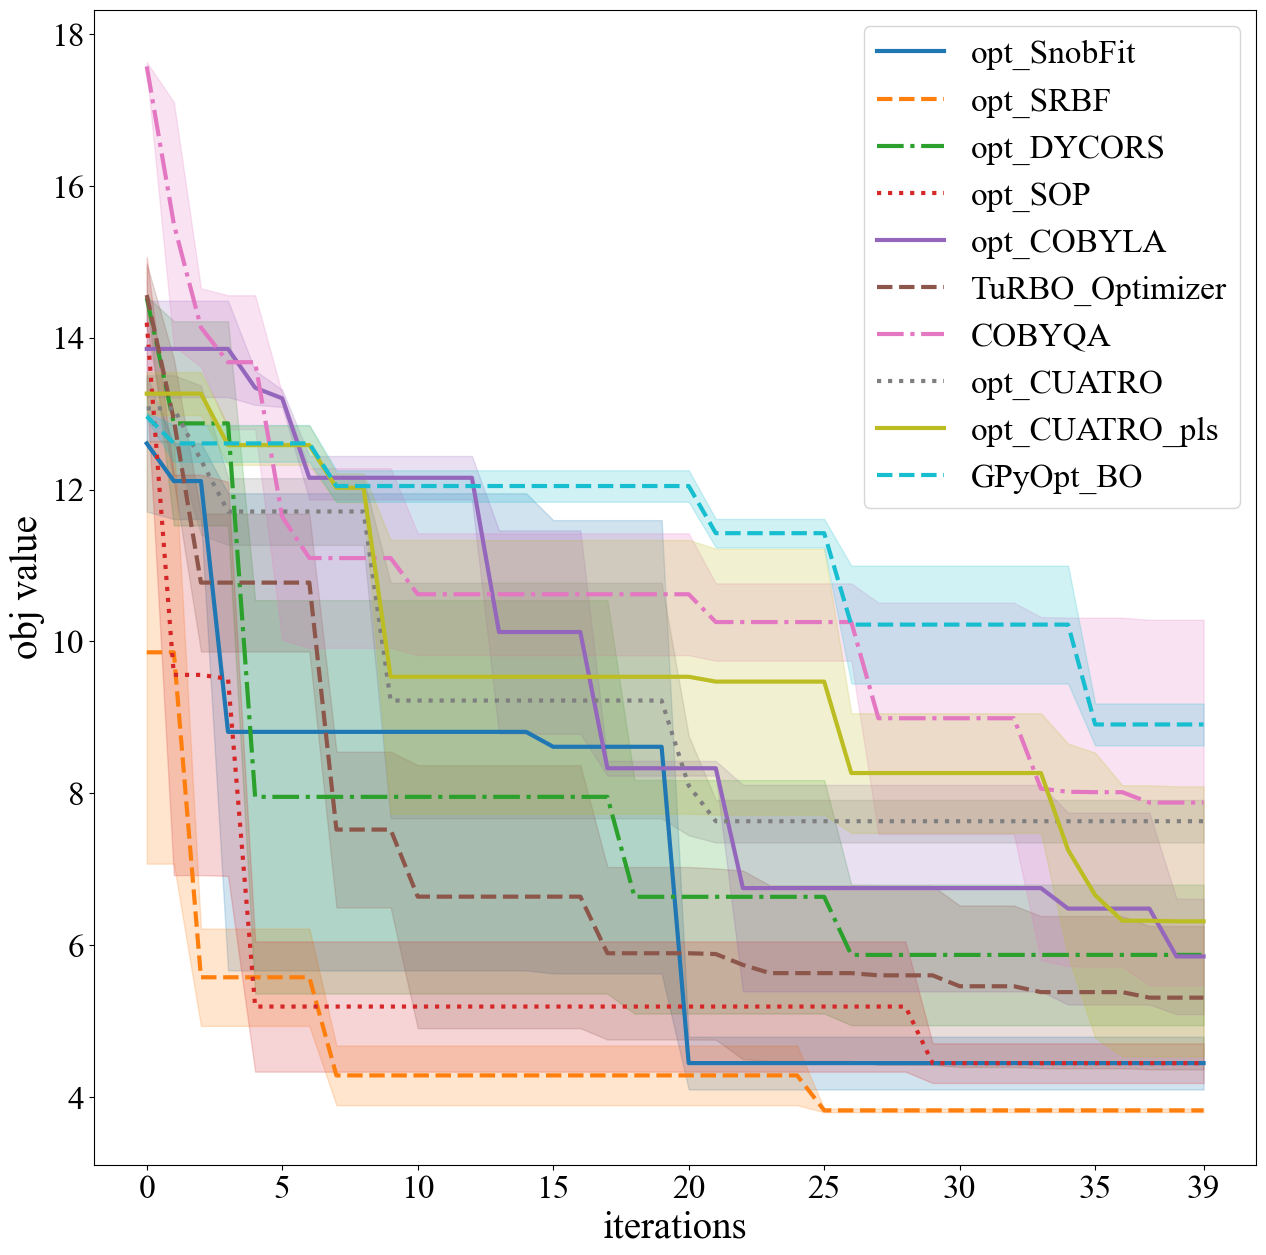

In [6]:
ML4CE_uncon_graph_abs(
    trajectories,
    algorithms_test,
    functions_test,
    N_x_l,
    home_dir,
    timestamp,
    SafeFig=SafeData,
)

In [7]:
K_opt = trajectories['D32']['cstr_pid_f']['x_list']['TuRBO_Optimizer'][0][-1]

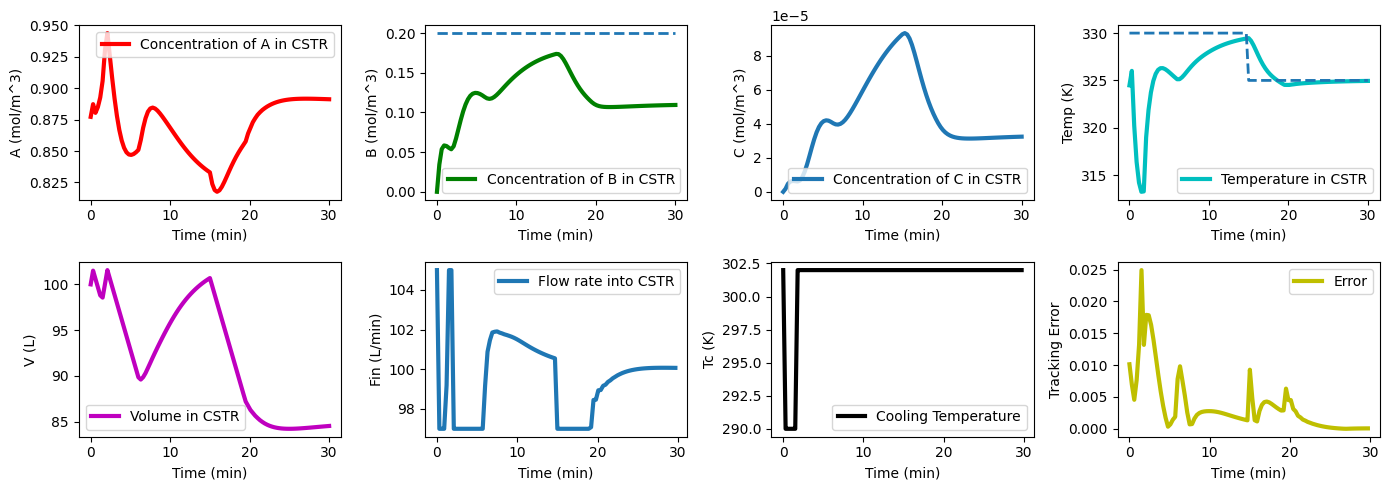

{'Ca_dat': array([[0.87725295, 0.87725295, 0.87725295],
        [0.88738196, 0.88738196, 0.88738196],
        [0.88043675, 0.88043675, 0.88043675],
        [0.88499308, 0.88499308, 0.88499308],
        [0.89267683, 0.89267683, 0.89267683],
        [0.90586456, 0.90586456, 0.90586456],
        [0.93077215, 0.93077215, 0.93077215],
        [0.94394499, 0.94394499, 0.94394499],
        [0.92606481, 0.92606481, 0.92606481],
        [0.90823984, 0.90823984, 0.90823984],
        [0.89194169, 0.89194169, 0.89194169],
        [0.87801508, 0.87801508, 0.87801508],
        [0.86683388, 0.86683388, 0.86683388],
        [0.85843208, 0.85843208, 0.85843208],
        [0.85261056, 0.85261056, 0.85261056],
        [0.84902764, 0.84902764, 0.84902764],
        [0.84727548, 0.84727548, 0.84727548],
        [0.84694015, 0.84694015, 0.84694015],
        [0.847643  , 0.847643  , 0.847643  ],
        [0.84906377, 0.84906377, 0.84906377],
        [0.85094868, 0.85094868, 0.85094868],
        [0.85877166, 0.8

In [8]:
from CSTR_PID import *
# # Example Use
# iter_tot = 40
CSTR = CSTRSimulation()
# Kpowell, f_opt = opt_alg(CSTR.J_ControlCSTR, int(32), CSTR.boundsK, iter_tot)
# print("Ks = ", Kpowell)
CSTR.plot_result_ct(K_opt)